In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
netflix=pd.read_csv('netflix_titles.csv')

In [3]:
#first few rows of dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
#shape of dataset
netflix.shape

(6234, 12)

In [5]:
#info about columns name and datatype
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
#checking missing values percentage
netflix.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        31.584857
cast             9.143407
country          7.635547
date_added       0.176452
release_year     0.000000
rating           0.160411
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [7]:
#check duplicated rows
netflix.duplicated().sum()

0

Here we create the copy of netflix dataset to practise for filling the missing values.
Since large percentage of values are missing from columns like 'director' ,'cast','country'.
Dropping those rows will results in massive loss of other data too.so we try filling it with most mode.although it is not accurate.it was just for practise


In [8]:
#creating a copy of netflix dataset
copyflix=netflix.copy()

In [9]:
copyflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [10]:
#replacing missing data by their most repeated value i.e mode
missings=['director','cast','country','date_added','rating']
copyflix[missings]=copyflix[missings].fillna(copyflix.mode().iloc[0])

In [11]:
copyflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
#filling the missing data of column 'date_added' by 0
netflix['date_added']=netflix['date_added'].fillna((0))

In [13]:
#changing datatype of date_added column to datetime datatype
netflix['date_added']=pd.to_datetime(netflix['date_added'],format='mixed')

In [14]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6234 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.6+ KB


In [15]:
#creating seperate columns for year,month and day
netflix['Year_added']=netflix['date_added'].dt.year
netflix['Month_added']=netflix['date_added'].dt.month
netflix['Day_added']=netflix['date_added'].dt.day
netflix['Day_name']=netflix['date_added'].dt.day_name()
netflix['month_name']=netflix['date_added'].dt.month_name()

In [16]:
netflix.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added,Day_added,Day_name,month_name
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9,9,Monday,September
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9,9,Friday,September
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9,8,Saturday,September
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9,8,Saturday,September


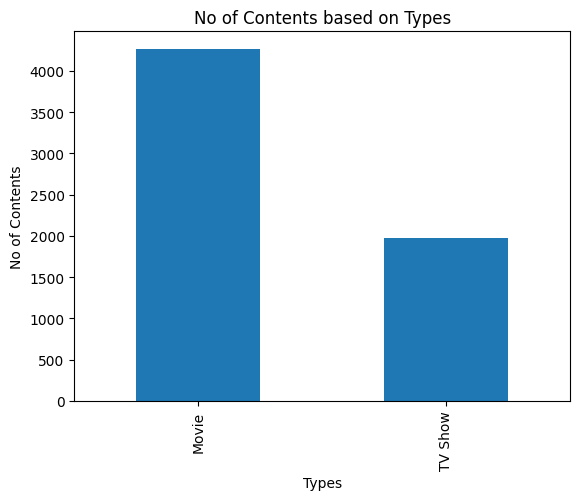

In [17]:
#Bar graph showing No of Contents based on Types
netflix['type'].value_counts().plot(kind='bar')
plt.title('No of Contents based on Types')
plt.xlabel('Types')
plt.ylabel('No of Contents')
plt.show()

Text(0.5, 1.0, 'Pie chart')

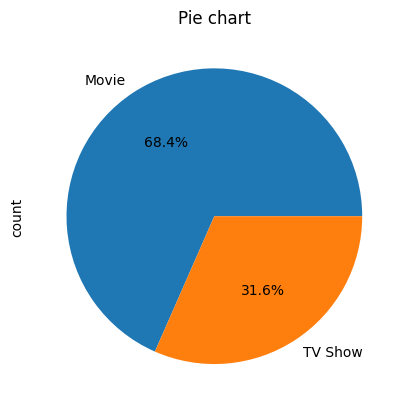

In [18]:
#Pie chart showing percentage of Contents based on Types
netflix['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Pie chart')

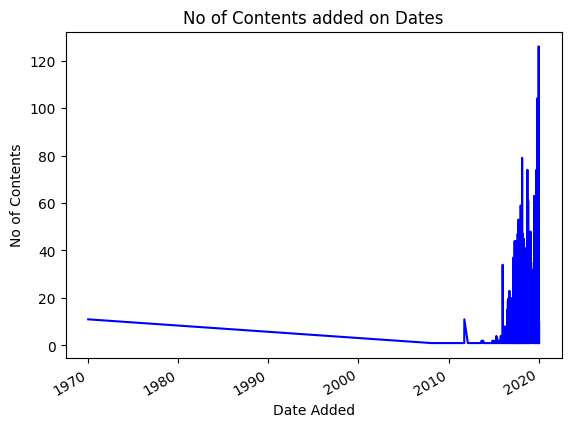

In [19]:
#line plot of No of Contents added on Dates
netflix['date_added'].value_counts().plot(kind='line',color='blue')
plt.title('No of Contents added on Dates')
plt.xlabel('Date Added')
plt.ylabel('No of Contents')
plt.show()

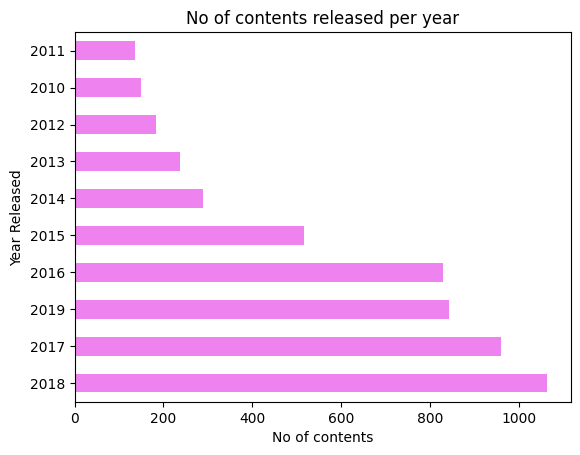

In [20]:
#Bar Graph of No of contents released per year
netflix['release_year'].value_counts().head(10).plot(kind='barh',color='violet')
plt.xlabel('No of contents')
plt.ylabel('Year Released')
plt.title('No of contents released per year')
plt.show()

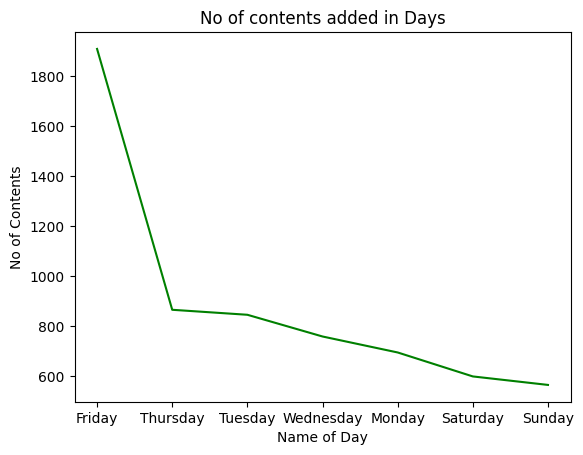

In [21]:
#Line graph of No of contents added in Days
netflix['Day_name'].value_counts().plot(kind='line',color='green')
plt.ylabel('No of Contents')
plt.xlabel('Name of Day')
plt.title('No of contents added in Days')
plt.show()

In [22]:
#group and count the number of contents added each month for each year they were added
cdmy=netflix.groupby('Year_added')['month_name'].value_counts().unstack().T.fillna(0)
cdmy

Year_added,1970,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month_name,,,,,,,,,,,,,,
April,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,23.0,99.0,132.0,183.0,0.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,44.0,118.0,179.0,163.0,0.0
December,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,23.0,98.0,131.0,203.0,232.0,0.0
February,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,16.0,87.0,93.0,174.0,0.0
January,11.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,44.0,74.0,137.0,167.0,184.0
July,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,8.0,31.0,82.0,164.0,186.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,96.0,81.0,189.0,0.0
March,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,19.0,146.0,182.0,198.0,0.0
May,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,14.0,114.0,108.0,183.0,0.0


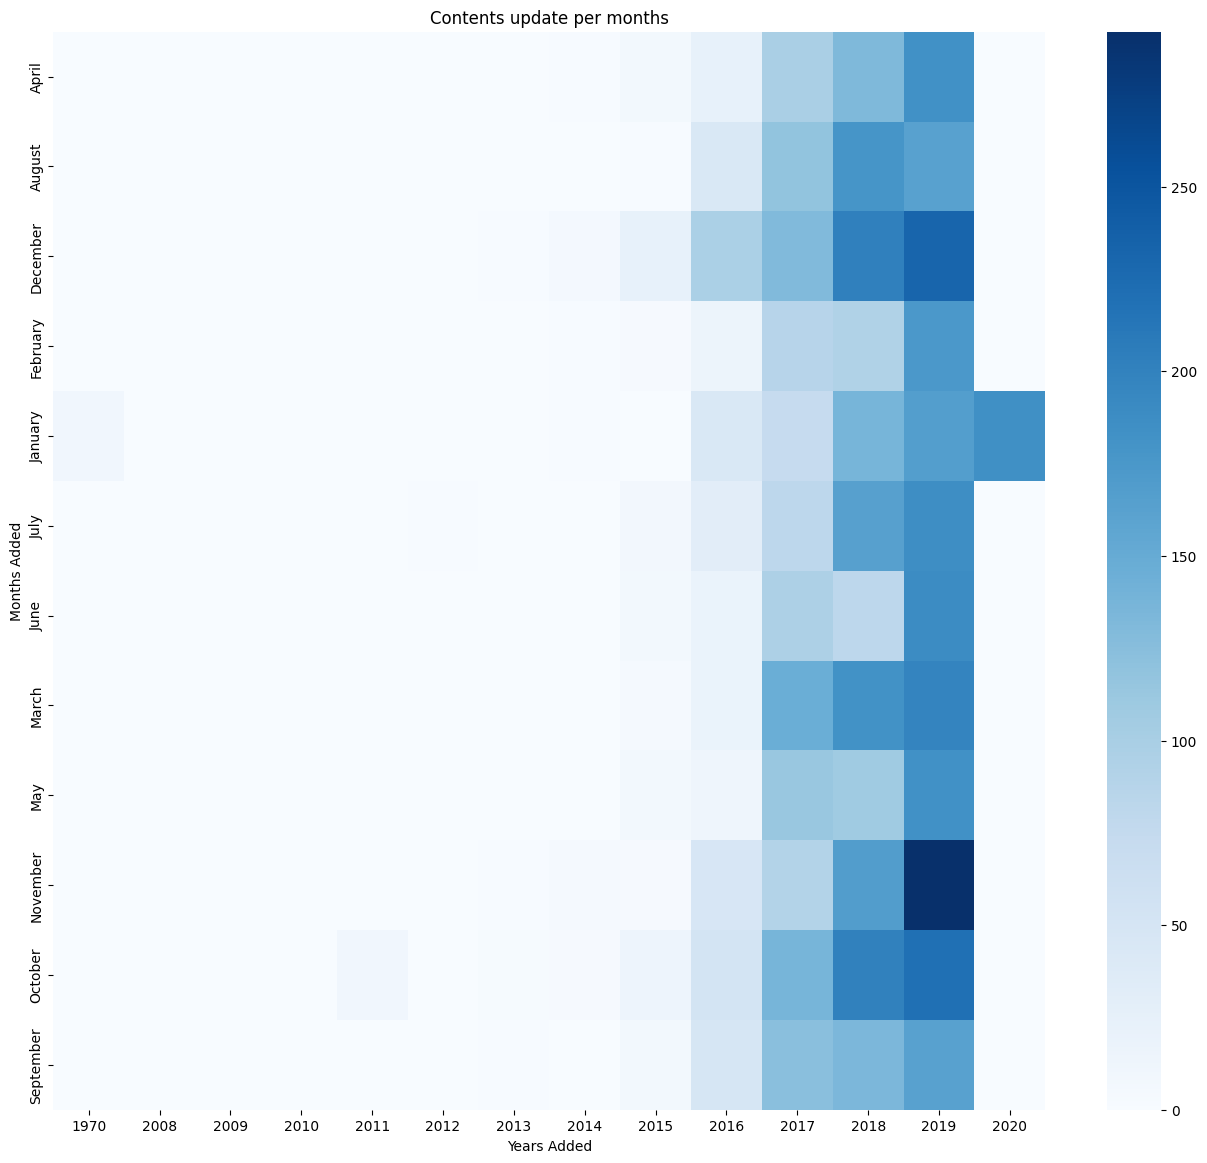

In [23]:
#Heatmap of netflix contents  by months
plt.figure(figsize=(16,14))
sns.heatmap(cdmy,cmap="Blues")
plt.xlabel('Years Added')
plt.ylabel('Months Added')
plt.title('Contents update per months')
plt.show()

In [24]:
netflix['country'].value_counts().head(10)

country
United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: count, dtype: int64

<Axes: ylabel='count'>

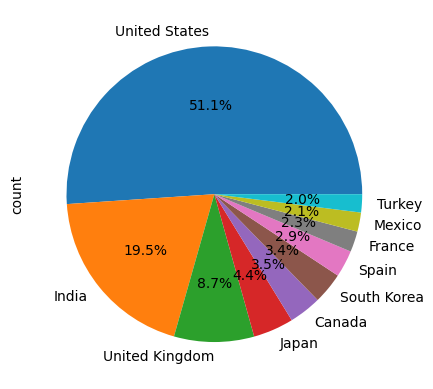

In [25]:
#pie chart showing contents from top 10 countries in percentage
netflix['country'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

In [26]:
netflix['rating'].value_counts()

rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: count, dtype: int64

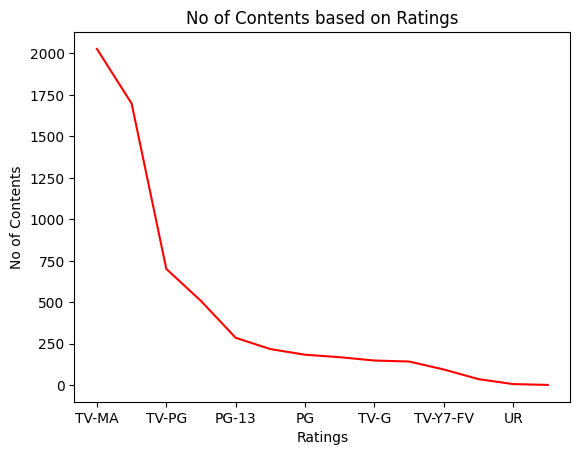

In [27]:
#line graph of ratings
netflix['rating'].value_counts().plot(kind='line',color='red')
plt.title('No of Contents based on Ratings')
plt.xlabel('Ratings')
plt.ylabel('No of Contents')
plt.show()

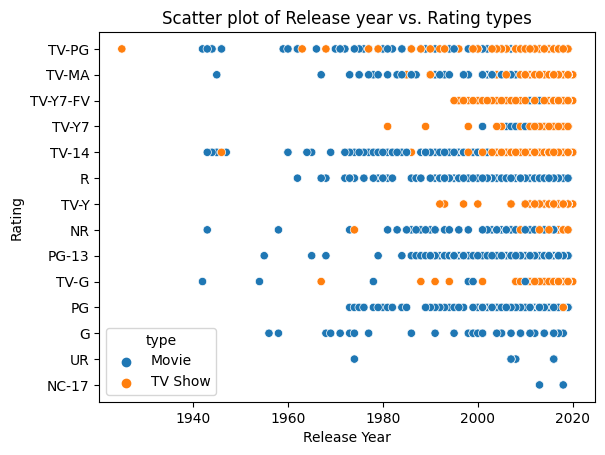

In [28]:
#Scatter plot of Release year vs Rating types
sns.scatterplot(data=netflix, x="release_year", y="rating", hue="type")
plt.xlabel("Release Year")
plt.ylabel("Rating")
plt.title("Scatter plot of Release year vs. Rating types")
plt.show()